## By exon and by gene significant STR analysis

## Average number of significant exons per STR

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scripts import qvalue

In [2]:
alpha = 0.001
chr_1 = pd.read_csv('/storage/dana/spliceSTR/regression_final/chr1_regression.csv',sep='\t')

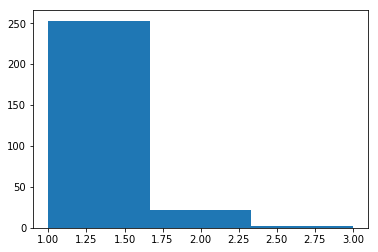

In [6]:
plt.hist(chr_1[chr_1['p.wald'] < alpha]['str.id'].value_counts(),bins=3,range=(1,3))
plt.show()

### So approximately 1 significant relationship for all STRs but those that have multiple affect exons in the same gene 

# How many significant STRs are there per exon?

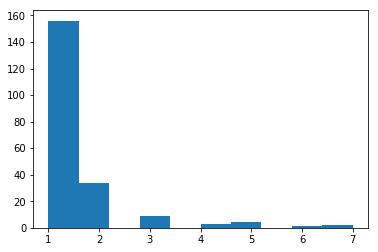

In [7]:
plt.hist(chr_1[chr_1['p.wald'] < alpha]['gene'].value_counts())
plt.show()

Who are the exons on the high end?

In [9]:
chr_1[chr_1['p.wald'] < alpha]['gene'].value_counts()

ENSG00000185420.14_12    7
ENSG00000117481.6_1      7
ENSG00000117054.9_1      6
ENSG00000163468.10_9     5
ENSG00000116977.14_11    5
ENSG00000122224.13_1     5
ENSG00000176261.11_6     5
ENSG00000001460.13_6     4
ENSG00000131236.12_2     4
ENSG00000116885.14_7     4
ENSG00000158062.16_13    3
ENSG00000116977.14_4     3
ENSG00000117226.7_4      3
ENSG00000174175.12_6     3
ENSG00000143198.8_2      3
ENSG00000132781.13_1     3
ENSG00000122481.12_1     3
ENSG00000176393.6_2      3
ENSG00000215790.2_7      3
ENSG00000198771.6_4      2
ENSG00000116885.14_3     2
ENSG00000117616.13_12    2
ENSG00000158711.9_4      2
ENSG00000117620.8_2      2
ENSG00000203666.8_4      2
ENSG00000132906.13_6     2
ENSG00000142606.11_2     2
ENSG00000132780.12_2     2
ENSG00000235750.5_4      2
ENSG00000163877.9_2      2
                        ..
ENSG00000196187.7_16     1
ENSG00000065978.13_5     1
ENSG00000118292.4_5      1
ENSG00000184007.13_4     1
ENSG00000069702.6_13     1
ENSG00000162687.12_3     1
E

In [12]:
my_gene = chr_1[chr_1['gene'] == 'ENSG00000185420.14_12']
my_gene[my_gene['p.wald'] < alpha]

,chrom,gene,str.id,str.start,n.miss,beta,beta.se,lambda.remel,p.wald
31325,chr1,ENSG00000185420.14_12,STR_246211147,246211147,42,-0.323885,0.058339,-1,6.904733e-08
31327,chr1,ENSG00000185420.14_12,STR_246212766,246212766,147,-0.383428,0.073475,-1,5.597408e-07
31328,chr1,ENSG00000185420.14_12,STR_246214436,246214436,158,0.330745,0.077837,-1,3.791818e-05
31330,chr1,ENSG00000185420.14_12,STR_246218480,246218480,28,-0.245431,0.058246,-1,3.403004e-05
31331,chr1,ENSG00000185420.14_12,STR_246220069,246220069,2,0.392918,0.052828,-1,1.061155e-12
31332,chr1,ENSG00000185420.14_12,STR_246222185,246222185,111,0.326229,0.067868,-1,3.066836e-06
31333,chr1,ENSG00000185420.14_12,STR_246222643,246222643,22,-0.222606,0.057952,-1,1.511536e-04


Honestly looks pretty legitimate but very weird - will have to verify these guys with bam files

In [24]:
genes = [exon.split('_')[0] for exon in chr_1['gene']]
exons = [exon for exon in chr_1['gene']]
genes = list(set(genes))
exons = list(set(exons))

In [2]:
summary_file = open('/storage/dana/spliceSTR/regression_final/exon_summary.tsv','w+')
summary_file.write('exon\tchrom\tstr.id\tbeta\tbeta.se\tp.val.bon\n')
for c in range(1,23):
    chr_df = pd.read_csv('/storage/dana/spliceSTR/regression_final/chr{}_regression.csv'.format(c),sep='\t')
    exons = set([exon for exon in chr_df['gene']])
    for exon in exons:
        exon_df = chr_df[chr_df['gene'] == exon]
        num_exons = exon_df.shape[0]
        exon_df['p_val_bon'] = [min(1,p*num_exons) for p in exon_df['p.wald']]
        exon_df = exon_df.sort_values(by='p_val_bon')
        best_exon = exon_df.iloc[0]
        summary_file.write('{}\t{}\t{}\t{}\t{}\t{}\n'.format(exon,
                                               c,
                                               best_exon['str.id'],
                                               best_exon['beta'],
                                               best_exon['beta.se'],
                                               best_exon['p_val_bon']))

/usr/lib/python3.4/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [45]:
summary_df['gene'] = [exon.split('_')[0] for exon in summary_df.index]
summary_df['q.values'] = qvalue.estimate(summary_df['p.val.adj'])

In [54]:
for exon in summary_file.write('')

,best.str,p.val.adj,gene,q.values
ENSG00000143774.12_2,STR_228326555,0.0236876,ENSG00000143774.12,0.308762
ENSG00000142794.14_13,STR_21791188,1,ENSG00000142794.14,1
ENSG00000078900.10_14,STR_3641583,1,ENSG00000078900.10,1
ENSG00000196517.7_9,STR_44484270,0.680842,ENSG00000196517.7,1
ENSG00000154451.10_3,STR_89721726,1,ENSG00000154451.10,1
ENSG00000143458.7_9,STR_151092397,0.173687,ENSG00000143458.7,0.752876
ENSG00000142748.8_4,STR_27698739,0.149194,ENSG00000142748.8,0.705756
ENSG00000162613.12_3,STR_78404275,1,ENSG00000162613.12,1
ENSG00000143569.14_1,STR_154200020,0.191762,ENSG00000143569.14,0.793816
ENSG00000117114.15_5,STR_82157008,1,ENSG00000117114.15,1


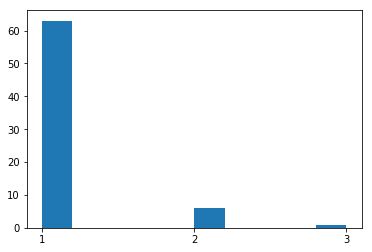

In [53]:
from matplotlib.ticker import MaxNLocator
ax = plt.figure().gca()
plt.hist(summary_df[summary_df['q.values'] < 0.01]['gene'].value_counts())
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

In [30]:
num_exons = exon_df.shape[0]
num_exons

3

In [31]:
exon_df['p_val_bon'] = [min(1,p*num_exons) for p in exon_df['p.wald']]

/usr/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [32]:
exon_df

,chrom,gene,str.id,str.start,n.miss,beta,beta.se,lambda.remel,p.wald,p_val_bon
784,chr1,ENSG00000162591.11_9,STR_3403698,3403698,108,-0.083158,0.071000,-1,0.242919,0.728756
785,chr1,ENSG00000162591.11_9,STR_3407693,3407693,71,-0.176107,0.064350,-1,0.006682,0.020047
786,chr1,ENSG00000162591.11_9,STR_3420264,3420264,0,-0.059382,0.057159,-1,0.299678,0.899035
